In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('DatosVino(in).csv')

Trabajaremos con un conjunto de datos de vinos, y nuestro objetivo será predecir tanto el precio como la calidad de una botella de vino.

In [3]:
df.head(2)

,ID,Beneficio,Compra,Acidez,AcidoCitrico,pH,CloruroSodico,Densidad,Azucar,Sulfatos,Alcohol,Etiqueta,CalifProductor,Clasificacion,Region,PrecioBotella
0,13606,0,0,0.39,0.14,4.99,0.073,1.02195,5.9,0.12,6.6,B,5,?,1.0,4.56
1,3119,0,0,2.19,2.58,5.54,0.205,0.95373,6.4,0.49,112.0,b,4,?,NaN,3.01


Exploración de los Datos (EDA - Exploratory Data Analysis)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6365 entries, 0 to 6364
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              6365 non-null   int64  
 1   Beneficio       6365 non-null   int64  
 2   Compra          6365 non-null   int64  
 3   Acidez          6365 non-null   float64
 4   AcidoCitrico    6365 non-null   float64
 5   pH              6365 non-null   float64
 6   CloruroSodico   6365 non-null   float64
 7   Densidad        6365 non-null   float64
 8   Azucar          6365 non-null   float64
 9   Sulfatos        5761 non-null   float64
 10  Alcohol         6365 non-null   float64
 11  Etiqueta        6365 non-null   object 
 12  CalifProductor  6365 non-null   int64  
 13  Clasificacion   6365 non-null   object 
 14  Region          6258 non-null   float64
 15  PrecioBotella   6365 non-null   float64
dtypes: float64(10), int64(4), object(2)
memory usage: 795.8+ KB


In [5]:
df.describe()

,ID,Beneficio,Compra,Acidez,AcidoCitrico,pH,CloruroSodico,Densidad,Azucar,Sulfatos,Alcohol,CalifProductor,Region,PrecioBotella
count,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000,5761.000000,6365.000000,6365.000000,6258.000000,6365.000000
mean,8010.702278,452.380204,0.785232,0.331214,0.314350,7.528735,46.977608,0.994204,8.851280,0.526659,17.460723,2.758523,2.011665,2.610652
std,4654.939139,308.380542,0.410694,0.787534,0.861428,1.118732,211.381101,0.026417,3.212404,0.948039,25.261544,1.302336,0.818336,1.480274
min,2.000000,0.000000,0.000000,-2.790000,-3.240000,4.800000,-1.171000,0.888090,0.000000,-3.120000,-4.500000,0.000000,1.000000,1.000000
25%,3980.000000,236.000000,1.000000,0.130000,0.020000,6.820000,-0.004000,0.988245,6.700000,0.280000,9.900000,2.000000,1.000000,1.420000
50%,8065.000000,480.000000,1.000000,0.280000,0.310000,7.920000,0.048000,0.994400,8.900000,0.500000,11.600000,3.000000,2.000000,2.190000
75%,12027.000000,671.000000,1.000000,0.650000,0.580000,8.400000,0.224000,1.000600,11.000000,0.880000,14.000000,3.000000,3.000000,3.440000
max,16128.000000,1568.000000,1.000000,3.680000,3.860000,9.300000,999.000000,1.099240,21.000000,4.210000,150.000000,9.000000,3.000000,11.440000


In [6]:
df.isnull().sum()

ID                  0
Beneficio           0
Compra              0
Acidez              0
AcidoCitrico        0
pH                  0
CloruroSodico       0
Densidad            0
Azucar              0
Sulfatos          604
Alcohol             0
Etiqueta            0
CalifProductor      0
Clasificacion       0
Region            107
PrecioBotella       0
dtype: int64

In [7]:
# Eliminar filas con valores nulos
df = df.dropna(subset=['Region'])

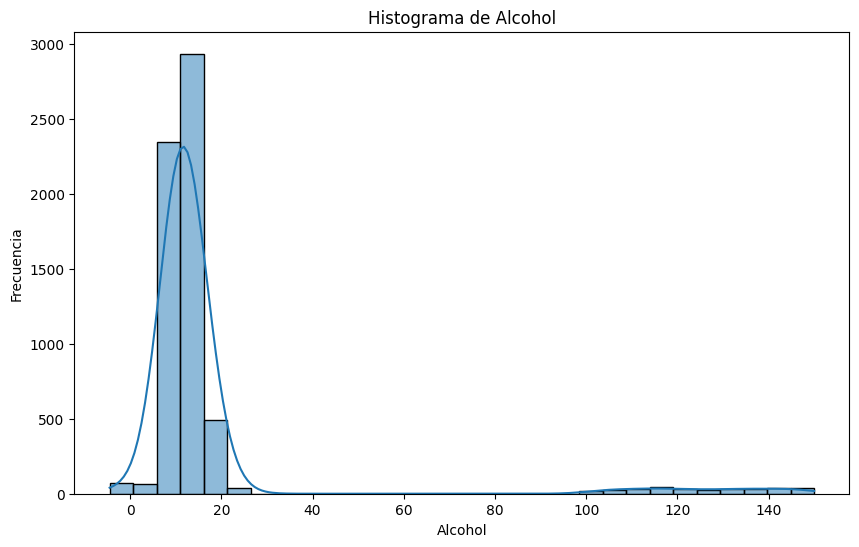

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de una variable continua
plt.figure(figsize=(10, 6))
sns.histplot(df['Alcohol'], bins=30, kde=True)
plt.title('Histograma de Alcohol')
plt.xlabel('Alcohol')
plt.ylabel('Frecuencia')
plt.show()


Columna de Alcohol con mas del 100% ? Datos anomalos o irregulares?

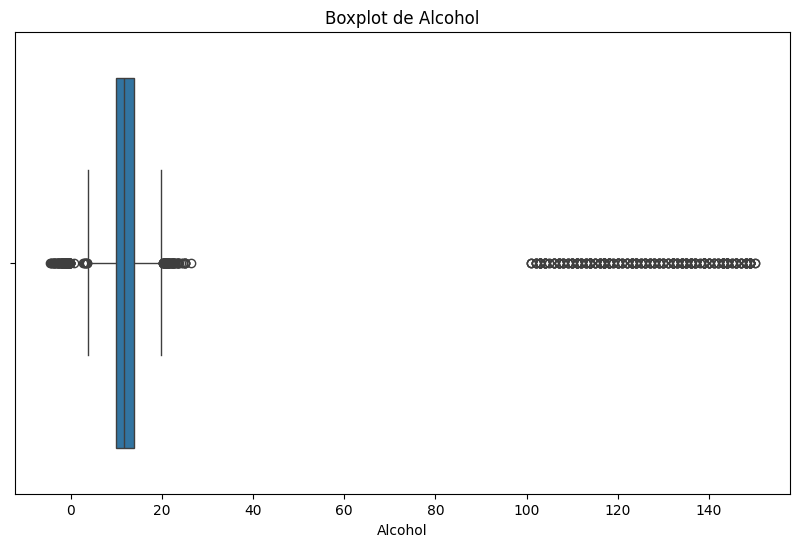

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot de la columna Alcohol
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Alcohol'])
plt.title('Boxplot de Alcohol')
plt.xlabel('Alcohol')
plt.show()

Aca se aprecia que hay valores de % de alcohol negativos y otros arriba del 100%

In [10]:
# Manejar valores anómalos en 'Alcohol'
df = df[(df['Alcohol'] >= 0) & (df['Alcohol'] <= 100)]

Segun datos anexos Azucar y Densidad son positivos

In [11]:
df = df[(df['Azucar'] >= 0) & (df['Densidad'] >= 0)]

In [12]:
df.isnull().sum()

ID                  0
Beneficio           0
Compra              0
Acidez              0
AcidoCitrico        0
pH                  0
CloruroSodico       0
Densidad            0
Azucar              0
Sulfatos          560
Alcohol             0
Etiqueta            0
CalifProductor      0
Clasificacion       0
Region              0
PrecioBotella       0
dtype: int64

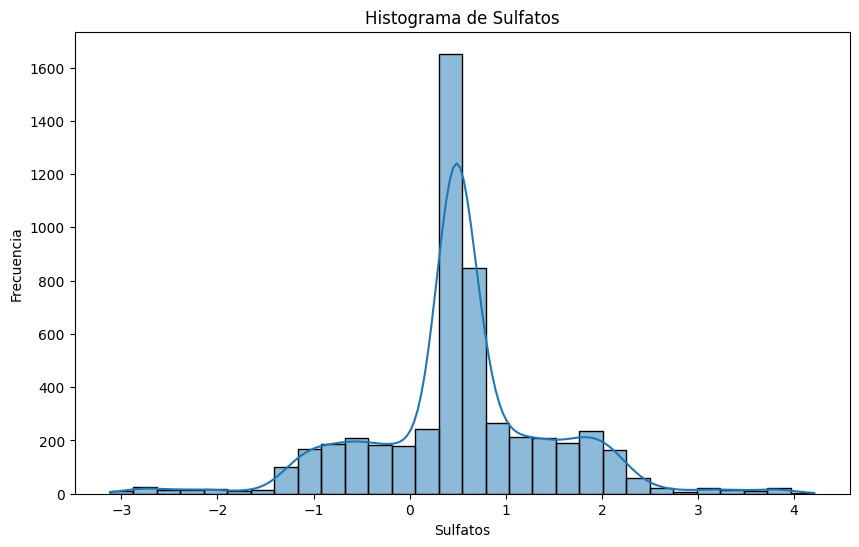

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de una variable continua
plt.figure(figsize=(10, 6))
sns.histplot(df['Sulfatos'], bins=30, kde=True)
plt.title('Histograma de Sulfatos')
plt.xlabel('Sulfatos')
plt.ylabel('Frecuencia')
plt.show()

Sulfatos negativos, valores anomalos?

In [14]:
df = df[(df['Sulfatos'] >= 0)]

In [15]:
df.Sulfatos.describe()

count    4238.000000
mean        0.866921
std         0.676300
min         0.000000
25%         0.440000
50%         0.570000
75%         1.160000
max         4.210000
Name: Sulfatos, dtype: float64

In [16]:
df['Sulfatos'] = df['Sulfatos'].fillna(df['Sulfatos'].mode())

In [17]:
df.head()

,ID,Beneficio,Compra,Acidez,AcidoCitrico,pH,CloruroSodico,Densidad,Azucar,Sulfatos,Alcohol,Etiqueta,CalifProductor,Clasificacion,Region,PrecioBotella
0,13606,0,0,0.39,0.14,4.99,0.073,1.02195,5.9,0.12,6.6,B,5,?,1.0,4.56
2,1190,0,0,1.44,-1.54,5.10,0.058,0.99271,7.1,0.39,10.2,B,2,?,1.0,1.00
4,2871,0,0,-0.10,0.30,5.75,0.048,1.02724,7.2,0.44,10.1,M,2,?,1.0,1.28
8,8725,0,0,0.46,-0.74,5.37,0.064,0.99718,1.5,1.91,11.0,R,5,?,2.0,2.95
10,15084,0,0,0.22,-0.56,5.28,0.035,0.97087,9.8,0.61,14.3,R,2,?,3.0,2.69


In [18]:
df.pH.describe()

count    4238.000000
mean        7.526458
std         1.123636
min         4.810000
25%         6.810000
50%         7.920000
75%         8.400000
max         9.300000
Name: pH, dtype: float64

In [19]:
df.CloruroSodico.describe()

count    4238.000000
mean       48.845393
std       215.340033
min        -1.171000
25%        -0.003000
50%         0.048000
75%         0.229000
max       999.000000
Name: CloruroSodico, dtype: float64

In [20]:
df.CalifProductor.unique()      

array([5, 2, 6, 3, 4, 7, 1, 8, 9, 0], dtype=int64)

In [21]:
df.Region.unique()

array([1., 2., 3.])

In [22]:
df.Etiqueta.unique()

array(['B', 'M', 'R', 'MB', 'MM', 'mb', 'b', 'r', 'm', 'mm'], dtype=object)

In [23]:
df['Etiqueta'] = df['Etiqueta'].str.upper()

In [24]:
df.duplicated().sum()

0

In [25]:
df.head()

,ID,Beneficio,Compra,Acidez,AcidoCitrico,pH,CloruroSodico,Densidad,Azucar,Sulfatos,Alcohol,Etiqueta,CalifProductor,Clasificacion,Region,PrecioBotella
0,13606,0,0,0.39,0.14,4.99,0.073,1.02195,5.9,0.12,6.6,B,5,?,1.0,4.56
2,1190,0,0,1.44,-1.54,5.10,0.058,0.99271,7.1,0.39,10.2,B,2,?,1.0,1.00
4,2871,0,0,-0.10,0.30,5.75,0.048,1.02724,7.2,0.44,10.1,M,2,?,1.0,1.28
8,8725,0,0,0.46,-0.74,5.37,0.064,0.99718,1.5,1.91,11.0,R,5,?,2.0,2.95
10,15084,0,0,0.22,-0.56,5.28,0.035,0.97087,9.8,0.61,14.3,R,2,?,3.0,2.69


Columna Etiqueta

In [26]:
# Crear un mapeo de etiquetas a números con sus descripciones
label_mapping = {
    'MM': 1,  # Muy malo
    'M': 2,   # Malo
    'R': 3,   # Regular
    'B': 4,   # Bueno
    'MB': 5   # Muy bueno
}

# Aplicar el mapeo a la columna 'Etiqueta'
df['Etiqueta'] = df['Etiqueta'].map(label_mapping)

Columna Calificacion

In [27]:
# Crear un mapeo de clasificaciones a números
classification_mapping = {
    '?': 0,    # Desconocido
    '*': 1,    # 1 estrella
    '**': 2,   # 2 estrellas
    '***': 3,  # 3 estrellas
    '****': 4  # 4 estrellas
}

# Aplicar el mapeo a la columna 'Clasificacion'
df['Clasificacion'] = df['Clasificacion'].map(classification_mapping)

In [28]:
df.head()

,ID,Beneficio,Compra,Acidez,AcidoCitrico,pH,CloruroSodico,Densidad,Azucar,Sulfatos,Alcohol,Etiqueta,CalifProductor,Clasificacion,Region,PrecioBotella
0,13606,0,0,0.39,0.14,4.99,0.073,1.02195,5.9,0.12,6.6,4,5,0,1.0,4.56
2,1190,0,0,1.44,-1.54,5.10,0.058,0.99271,7.1,0.39,10.2,4,2,0,1.0,1.00
4,2871,0,0,-0.10,0.30,5.75,0.048,1.02724,7.2,0.44,10.1,2,2,0,1.0,1.28
8,8725,0,0,0.46,-0.74,5.37,0.064,0.99718,1.5,1.91,11.0,3,5,0,2.0,2.95
10,15084,0,0,0.22,-0.56,5.28,0.035,0.97087,9.8,0.61,14.3,3,2,0,3.0,2.69


Como el objetivo es preparar los datos para un modelo de machine learning y ID no aporta información relevante, es recomendable eliminarlo.

In [29]:
df = df.drop(columns='ID')

In [30]:
df.head()

,Beneficio,Compra,Acidez,AcidoCitrico,pH,CloruroSodico,Densidad,Azucar,Sulfatos,Alcohol,Etiqueta,CalifProductor,Clasificacion,Region,PrecioBotella
0,0,0,0.39,0.14,4.99,0.073,1.02195,5.9,0.12,6.6,4,5,0,1.0,4.56
2,0,0,1.44,-1.54,5.10,0.058,0.99271,7.1,0.39,10.2,4,2,0,1.0,1.00
4,0,0,-0.10,0.30,5.75,0.048,1.02724,7.2,0.44,10.1,2,2,0,1.0,1.28
8,0,0,0.46,-0.74,5.37,0.064,0.99718,1.5,1.91,11.0,3,5,0,2.0,2.95
10,0,0,0.22,-0.56,5.28,0.035,0.97087,9.8,0.61,14.3,3,2,0,3.0,2.69


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4238 entries, 0 to 6364
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Beneficio       4238 non-null   int64  
 1   Compra          4238 non-null   int64  
 2   Acidez          4238 non-null   float64
 3   AcidoCitrico    4238 non-null   float64
 4   pH              4238 non-null   float64
 5   CloruroSodico   4238 non-null   float64
 6   Densidad        4238 non-null   float64
 7   Azucar          4238 non-null   float64
 8   Sulfatos        4238 non-null   float64
 9   Alcohol         4238 non-null   float64
 10  Etiqueta        4238 non-null   int64  
 11  CalifProductor  4238 non-null   int64  
 12  Clasificacion   4238 non-null   int64  
 13  Region          4238 non-null   float64
 14  PrecioBotella   4238 non-null   float64
dtypes: float64(10), int64(5)
memory usage: 529.8 KB


In [32]:
df.head()

,Beneficio,Compra,Acidez,AcidoCitrico,pH,CloruroSodico,Densidad,Azucar,Sulfatos,Alcohol,Etiqueta,CalifProductor,Clasificacion,Region,PrecioBotella
0,0,0,0.39,0.14,4.99,0.073,1.02195,5.9,0.12,6.6,4,5,0,1.0,4.56
2,0,0,1.44,-1.54,5.10,0.058,0.99271,7.1,0.39,10.2,4,2,0,1.0,1.00
4,0,0,-0.10,0.30,5.75,0.048,1.02724,7.2,0.44,10.1,2,2,0,1.0,1.28
8,0,0,0.46,-0.74,5.37,0.064,0.99718,1.5,1.91,11.0,3,5,0,2.0,2.95
10,0,0,0.22,-0.56,5.28,0.035,0.97087,9.8,0.61,14.3,3,2,0,3.0,2.69


In [33]:
columnas_a_convertir = ['Region', 'Clasificacion', 'CalifProductor', 'Etiqueta', 'Beneficio', 'Compra']
df[columnas_a_convertir] = df[columnas_a_convertir].astype('int16')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4238 entries, 0 to 6364
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Beneficio       4238 non-null   int16  
 1   Compra          4238 non-null   int16  
 2   Acidez          4238 non-null   float64
 3   AcidoCitrico    4238 non-null   float64
 4   pH              4238 non-null   float64
 5   CloruroSodico   4238 non-null   float64
 6   Densidad        4238 non-null   float64
 7   Azucar          4238 non-null   float64
 8   Sulfatos        4238 non-null   float64
 9   Alcohol         4238 non-null   float64
 10  Etiqueta        4238 non-null   int16  
 11  CalifProductor  4238 non-null   int16  
 12  Clasificacion   4238 non-null   int16  
 13  Region          4238 non-null   int16  
 14  PrecioBotella   4238 non-null   float64
dtypes: float64(9), int16(6)
memory usage: 380.8 KB


In [35]:
df.isnull().sum()

Beneficio         0
Compra            0
Acidez            0
AcidoCitrico      0
pH                0
CloruroSodico     0
Densidad          0
Azucar            0
Sulfatos          0
Alcohol           0
Etiqueta          0
CalifProductor    0
Clasificacion     0
Region            0
PrecioBotella     0
dtype: int64

In [36]:
df.to_csv('Vino_normalizado.csv', index=False)